# 테스트 코드
기존의 야구 데이터에서 아무 데이터 없이 다음 경기를 예측해야 하는 문제다.   
즉, 주식 예측과 다를바 없을것,   
__특히 주식은 이전 값이 다음 값에 영향을 주지 않지만, 야구는 이전과 그 이후의 변화가 크지 않음__   
> 간단한 LSTM으로 승패 예측 테스트

In [153]:
import pandas as pd
df2016 = pd.read_csv('2021 빅콘테스트_데이터분석분야_루키리그_팀투수_2016.csv')
df2017 = pd.read_csv('2021 빅콘테스트_데이터분석분야_루키리그_팀투수_2017.csv')
df2018 = pd.read_csv('2021 빅콘테스트_데이터분석분야_루키리그_팀투수_2018.csv')
df2019 = pd.read_csv('2021 빅콘테스트_데이터분석분야_루키리그_팀투수_2019.csv')
df2020 = pd.read_csv('2021 빅콘테스트_데이터분석분야_루키리그_팀투수_2020.csv')
df2021 = pd.read_csv('2021 빅콘테스트_데이터분석분야_루키리그_팀투수_2021.csv')

In [154]:
total = pd.concat([df2016, df2017, df2018, df2019, df2020, df2021], ignore_index=True)
total

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,TB_SC,CG_CK,QUIT_CK,WLS,HOLD,INN2,BF,PA,AB,HIT,H2,H3,HR,SB,CS,SH,SF,BB,IB,HP,KK,GD,WP,BK,ERR,R,ER,P_WHIP_RT,P2_WHIP_RT,CB_WHIP_RT
0,20160401HHLG0,20160401,LG,HH,0,B,0,0,W,0,36,184,52,46,13,2,0,0,0,0,3,0,3,0,0,10,1,0,0,0,4,4,0.642857,0.0,2.400000
1,20160401HHLG0,20160401,HH,LG,0,T,0,0,L,0,34,196,47,42,9,2,0,1,2,1,1,0,4,0,0,11,0,1,0,0,5,4,1.500000,0.0,0.750000
2,20160401HTNC0,20160401,NC,HT,0,B,0,0,W,0,27,143,38,34,8,3,0,1,0,0,0,0,3,0,1,10,1,2,0,0,4,4,1.333333,0.0,2.142857
3,20160401HTNC0,20160401,HT,NC,0,T,0,0,L,0,24,147,36,30,9,2,0,2,0,0,1,0,5,0,0,9,1,0,0,0,5,5,0.500000,0.0,1.875000
4,20160401KTSK0,20160401,SK,KT,0,B,0,0,L,0,27,151,42,36,11,0,0,2,2,1,0,1,4,0,1,7,0,0,0,0,8,8,1.000000,0.0,2.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,20210711HHSK0,20210711,HH,SK,0,T,0,0,L,0,24,169,41,33,13,1,0,1,0,1,1,0,4,0,3,5,2,0,0,0,8,8,1.363636,0.0,1.500000
7964,20210711KTHT0,20210711,HT,KT,0,B,0,0,W,1,27,147,34,29,2,0,0,0,1,1,0,0,5,0,0,5,0,0,0,1,0,0,0.600000,0.0,0.250000
7965,20210711KTHT0,20210711,KT,HT,0,T,0,0,L,0,24,134,31,29,4,1,0,1,1,0,0,0,2,0,0,14,0,1,0,0,2,2,1.500000,0.0,0.333333
7966,20210711LTSS0,20210711,LT,SS,0,T,0,0,L,0,24,149,41,37,14,3,0,3,0,0,2,1,1,0,0,5,0,1,0,1,11,9,2.142857,0.0,1.666667


In [155]:
df = total[['G_ID', 'GDAY_DS', 'T_ID', 'VS_T_ID', 'HEADER_NO', 'WLS']]
df

,G_ID,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,WLS
0,20160401HHLG0,20160401,LG,HH,0,W
1,20160401HHLG0,20160401,HH,LG,0,L
2,20160401HTNC0,20160401,NC,HT,0,W
3,20160401HTNC0,20160401,HT,NC,0,L
4,20160401KTSK0,20160401,SK,KT,0,L
...,...,...,...,...,...,...
7963,20210711HHSK0,20210711,HH,SK,0,L
7964,20210711KTHT0,20210711,HT,KT,0,W
7965,20210711KTHT0,20210711,KT,HT,0,L
7966,20210711LTSS0,20210711,LT,SS,0,L


In [156]:
df = df.drop(['G_ID'], axis=1)
df

,GDAY_DS,T_ID,VS_T_ID,HEADER_NO,WLS
0,20160401,LG,HH,0,W
1,20160401,HH,LG,0,L
2,20160401,NC,HT,0,W
3,20160401,HT,NC,0,L
4,20160401,SK,KT,0,L
...,...,...,...,...,...
7963,20210711,HH,SK,0,L
7964,20210711,HT,KT,0,W
7965,20210711,KT,HT,0,L
7966,20210711,LT,SS,0,L


In [157]:
df['HEADER_NO'].value_counts()

0    7838
1      66
2      64
Name: HEADER_NO, dtype: int64

In [158]:
# 원한 벡터로 데이터 변환 함수 선언

def one_hot_Encoding(data, column) :
    freq = data[column].value_counts()
    vocabulary = freq.sort_values(ascending = False).index

    for word in vocabulary:
        new_column = column + '_' + str(word)
        data[new_column] = 0

    for word in vocabulary:
        target_index = data[data[column] == word].index
        new_column = column + '_' + str(word)
        data.loc[target_index, new_column] = 1

    del(data[column])

In [159]:
one_hot_Encoding(df, 'HEADER_NO')
df

,GDAY_DS,T_ID,VS_T_ID,WLS,HEADER_NO_0,HEADER_NO_1,HEADER_NO_2
0,20160401,LG,HH,W,1,0,0
1,20160401,HH,LG,L,1,0,0
2,20160401,NC,HT,W,1,0,0
3,20160401,HT,NC,L,1,0,0
4,20160401,SK,KT,L,1,0,0
...,...,...,...,...,...,...,...
7963,20210711,HH,SK,L,1,0,0
7964,20210711,HT,KT,W,1,0,0
7965,20210711,KT,HT,L,1,0,0
7966,20210711,LT,SS,L,1,0,0


In [160]:
one_hot_Encoding(df, 'T_ID')
one_hot_Encoding(df, 'VS_T_ID')
df

,GDAY_DS,WLS,HEADER_NO_0,HEADER_NO_1,HEADER_NO_2,T_ID_WO,T_ID_SK,T_ID_SS,T_ID_HH,T_ID_LT,T_ID_KT,T_ID_LG,T_ID_OB,T_ID_HT,T_ID_NC,VS_T_ID_WO,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_HH,VS_T_ID_LT,VS_T_ID_KT,VS_T_ID_LG,VS_T_ID_OB,VS_T_ID_HT,VS_T_ID_NC
0,20160401,W,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,20160401,L,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,20160401,W,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,20160401,L,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,20160401,L,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,20210711,L,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7964,20210711,W,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
7965,20210711,L,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7966,20210711,L,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [161]:
df['WLS'].value_counts()

W    3937
L    3937
D      94
Name: WLS, dtype: int64

In [162]:
label = list()
for i in df['WLS']:
    if i == 'W' : label.append(1)
    elif i == 'D' : label.append(0.5)
    elif i == 'L' :  label.append(0)

In [163]:
df.loc[:, 'label'] = label
df

,GDAY_DS,WLS,HEADER_NO_0,HEADER_NO_1,HEADER_NO_2,T_ID_WO,T_ID_SK,T_ID_SS,T_ID_HH,T_ID_LT,T_ID_KT,T_ID_LG,T_ID_OB,T_ID_HT,T_ID_NC,VS_T_ID_WO,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_HH,VS_T_ID_LT,VS_T_ID_KT,VS_T_ID_LG,VS_T_ID_OB,VS_T_ID_HT,VS_T_ID_NC,label
0,20160401,W,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
1,20160401,L,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
2,20160401,W,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0
3,20160401,L,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0
4,20160401,L,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,20210711,L,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0
7964,20210711,W,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0
7965,20210711,L,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0
7966,20210711,L,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0


In [164]:
del(df['WLS'])

In [165]:
# 날짜 데이터 년, 월, 일로 변경
year = list()
month = list()
day = list()
for i in df['GDAY_DS']:
    i = str(i)
    year.append(int(i[2:4]))
    month.append(int(i[4:6]))
    day.append(int(i[6:]))

In [166]:
df.loc[:, 'year'] = year
df.loc[:, 'month'] = month
df.loc[:, 'day'] = day
df

,GDAY_DS,HEADER_NO_0,HEADER_NO_1,HEADER_NO_2,T_ID_WO,T_ID_SK,T_ID_SS,T_ID_HH,T_ID_LT,T_ID_KT,T_ID_LG,T_ID_OB,T_ID_HT,T_ID_NC,VS_T_ID_WO,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_HH,VS_T_ID_LT,VS_T_ID_KT,VS_T_ID_LG,VS_T_ID_OB,VS_T_ID_HT,VS_T_ID_NC,label,year,month,day
0,20160401,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,16,4,1
1,20160401,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,16,4,1
2,20160401,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,16,4,1
3,20160401,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,16,4,1
4,20160401,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,16,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,20210711,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,21,7,11
7964,20210711,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,21,7,11
7965,20210711,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,21,7,11
7966,20210711,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,21,7,11


In [167]:
del(df['GDAY_DS'])
df

,HEADER_NO_0,HEADER_NO_1,HEADER_NO_2,T_ID_WO,T_ID_SK,T_ID_SS,T_ID_HH,T_ID_LT,T_ID_KT,T_ID_LG,T_ID_OB,T_ID_HT,T_ID_NC,VS_T_ID_WO,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_HH,VS_T_ID_LT,VS_T_ID_KT,VS_T_ID_LG,VS_T_ID_OB,VS_T_ID_HT,VS_T_ID_NC,label,year,month,day
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,16,4,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,16,4,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,16,4,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,16,4,1
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,16,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,21,7,11
7964,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1.0,21,7,11
7965,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,21,7,11
7966,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,21,7,11


In [168]:
from sklearn.model_selection import train_test_split

In [174]:
label = df['label']
label

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
7963    0.0
7964    1.0
7965    0.0
7966    0.0
7967    1.0
Name: label, Length: 7968, dtype: float64

In [175]:
del(df['label'])
df

,HEADER_NO_0,HEADER_NO_1,HEADER_NO_2,T_ID_WO,T_ID_SK,T_ID_SS,T_ID_HH,T_ID_LT,T_ID_KT,T_ID_LG,T_ID_OB,T_ID_HT,T_ID_NC,VS_T_ID_WO,VS_T_ID_SK,VS_T_ID_SS,VS_T_ID_HH,VS_T_ID_LT,VS_T_ID_KT,VS_T_ID_LG,VS_T_ID_OB,VS_T_ID_HT,VS_T_ID_NC,year,month,day
0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,16,4,1
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,16,4,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,16,4,1
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,16,4,1
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,16,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7963,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,21,7,11
7964,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,21,7,11
7965,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21,7,11
7966,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,21,7,11


In [177]:
x_train, x_val, y_train, y_val = train_test_split(df, label, test_size=0.2, stratify=label, random_state=34)

In [183]:
from tensorflow.keras.layers import Dense
from tensorflow import keras
import tensorflow as tf

In [203]:
model = keras.Sequential()
model.add(keras.Input(shape=26))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=[tf.keras.metrics.Accuracy()])

In [205]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 26, validation_data=(x_val, y_val))

Epoch 1/20


TypeError: ignored

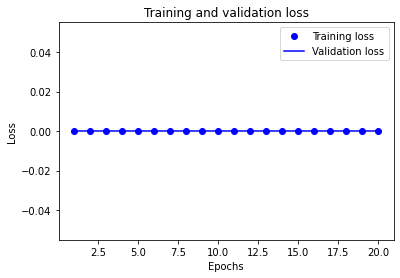

In [190]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [193]:
df.shape

(7968, 26)

In [199]:
type(df['HEADER_NO_0'])

pandas.core.series.Series